# uspto: UNITED STATES PATENT AND TRADEMARK OFFICE

URL: https://www.uspto.gov/

Focus on Trademarks.

You can find `TRADEMARKS` on https://bulkdata.uspto.gov/.

According to the page:

```
Trademark Application Images (JAN 2009 - PRESENT)
The 24 Hour Box zipfile contains images of daily Trademark applications in either JPG format (black and white, grayscale, or color) or TIFF format (black and white) processed through the Trademark Image Capture and Retrieval System (TICRS) and viewable using any standard image viewer. JPG images are accompanied by an XML file that contains text information about the application. TIFF images contain the application number embedded in the image (stamped prior to scan).
The 24 Hour Box Supplemental zipfile(s) contain Trademark cropped TIFF (black and white) or cropped JPG (color) image files from paper submissions of Trademark applications. These cropped images are available one day after they appear as full-page drawing images in the 24 Hour Box zipfiles.
```

## Use just images

Probably you only need Supplemental zipfile(s).

For example, on https://bulkdata.uspto.gov/data/trademark/application/images/2017/, you can manually download `hrsxxx.zip` and get images by unzipping it.

In [21]:
import urllib.request, urllib.error
from html.parser import HTMLParser
import re

class TrademarkPageParser(HTMLParser):

    def __init__(self):
        HTMLParser.__init__(self)
        self.fname = ""
        self.fname_list = []

    def handle_starttag(self, tag, attrs):
        if tag == "a":
            attrs = dict(attrs)
            if 'href' in attrs:
                self.fname = attrs['href']

    def handle_endtag(self, tag):
        if self.fname and re.match('^hrs', self.fname):
            self.fname_list.append(self.fname)
            self.fname = ""

In [24]:
base_url = "https://bulkdata.uspto.gov/data/trademark/application/images/"
url = base_url + "2017/"

zip_list = []

In [27]:
response = urllib.request.urlopen(url)

parser = TrademarkPageParser()
parser.feed( str(response.read()) )

zip_list.extend(parser.fname_list)

parser.close()
response.close()

Flatten the list.

In [31]:
zip_list = [item for sublist in zip_list for item in sublist]

In [33]:
zip_list[0:5]

['hrs170103a.zip',
 'hrs170103b.zip',
 'hrs170103c.zip',
 'hrs170104a.zip',
 'hrs170105a.zip']

In [38]:
import os

def create_link(base_url, year, fname):
    return( os.path.join(base_url, year, fname) )

In [44]:
zip_link = create_link(base_url, "2017", zip_list[0])
zip_link

'https://bulkdata.uspto.gov/data/trademark/application/images/2017/hrs170103a.zip'

In [56]:
def download_file(link, savedir):
    fname = os.path.basename(link)
    savefpath = os.path.join(savedir, fname)
    urllib.request.urlretrieve(link, savefpath)
    return savefpath

In [57]:
fpath = download_file(zip_link, "./data")

In [68]:
import zipfile

def unzipfile(fpath, savedir):
    with zipfile.ZipFile(fpath,"r") as zip_ref:
        zip_ref.extractall(savedir)
    os.remove(fpath)
    return

In [65]:
os.makedirs("./data/images/", exist_ok=True)

In [66]:
unzipfile(fpath,"./data/images/")

Get data.

In [70]:
%%time

for elem in zip_list:
    zip_link = create_link(base_url, "2017", elem)
    fpath = download_file(zip_link, "./data/")
    unzipfile(fpath, "./data/images/")

## Use also xml data [WIP]

In [1]:
from xml.etree import ElementTree

In [2]:
import glob

In [3]:
xml_file_paths = glob.glob("./data/hr170102/**/**/*.XML")

In [6]:
for fpath in xml_file_paths[0:10]:
    print(fpath)
    tree = ElementTree.parse(fpath)
    root = tree.getroot()
    
    file_name = root.findall(".//file-name")
    for elem in file_name:
        if elem.get('acceptable') == 'y':
            print(elem.tag, elem.text)

./data/hr170102/872821/87282148/00000001.XML
./data/hr170102/872822/87282237/00000001.XML
file-name 00000002.JPG
./data/hr170102/872822/87282269/00000001.XML
file-name 00000002.JPG
./data/hr170102/872822/87282276/00000001.XML
file-name 00000002.JPG
./data/hr170102/872822/87282280/00000001.XML
file-name 00000002.JPG
./data/hr170102/872822/87282281/00000001.XML
file-name 00000002.JPG
./data/hr170102/872822/87282284/00000001.XML
file-name 00000002.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005.JPG
file-name 00000003.JPG
file-name 00000004.JPG
file-name 00000005

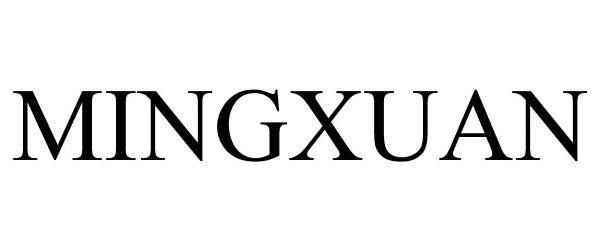

In [12]:
from IPython.display import Image, display_jpeg

display_jpeg(Image("/work/data/hr170102/872822/87282288/00000002.JPG"))

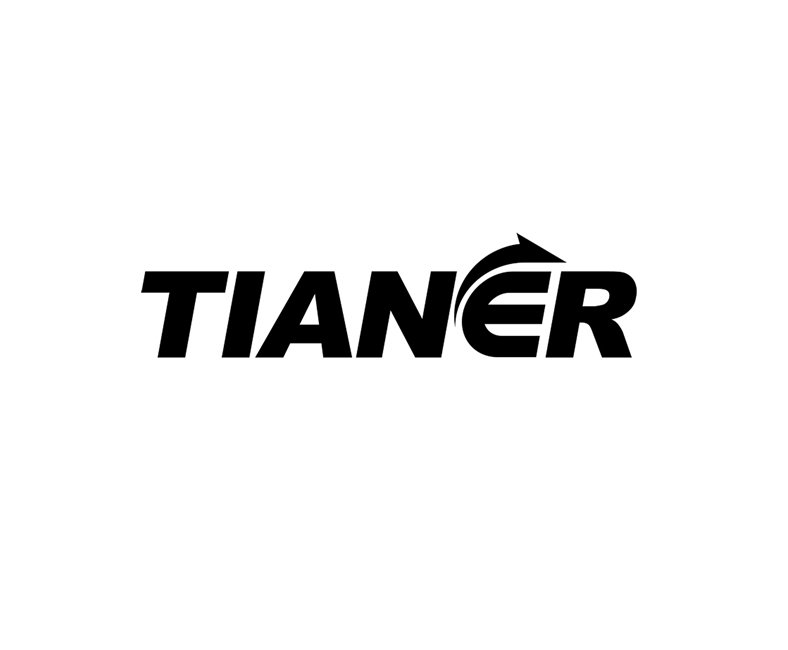

In [8]:
from IPython.display import Image, display_jpeg

display_jpeg(Image("/work/data/hr170102/872822/87282284/00000002.JPG"))

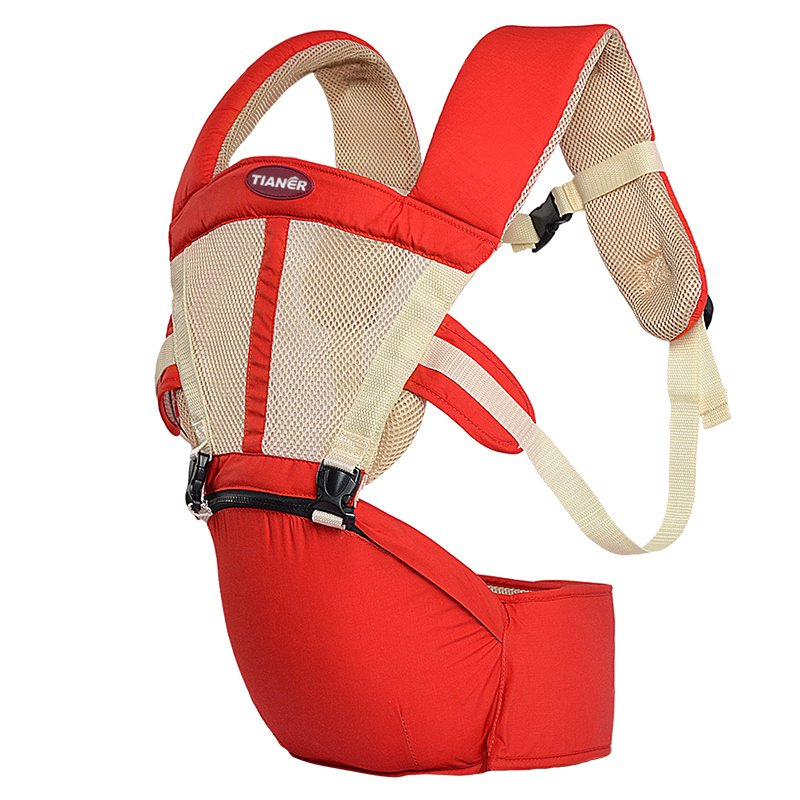

In [9]:
from IPython.display import Image, display_jpeg

display_jpeg(Image("/work/data/hr170102/872822/87282284/00000003.JPG"))

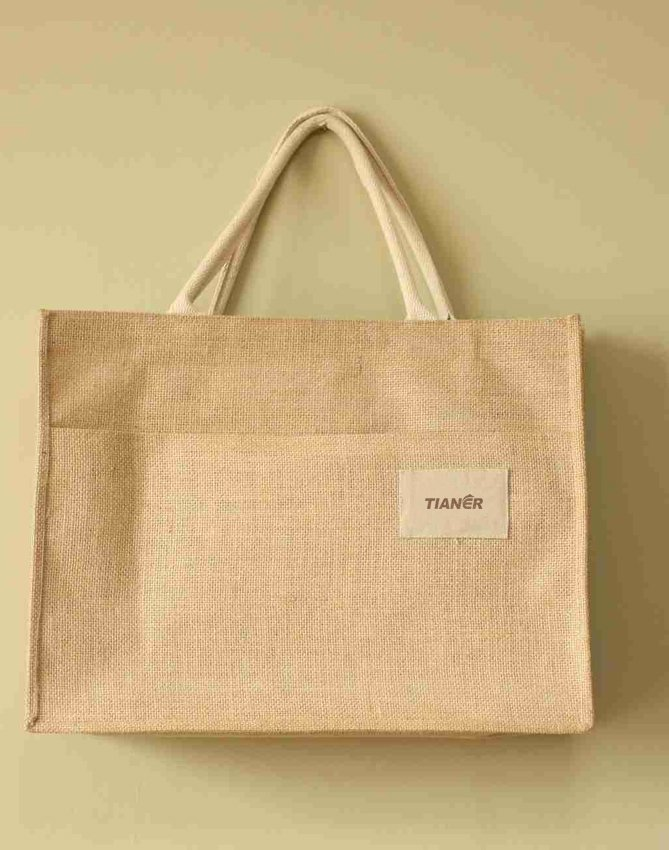

In [10]:
from IPython.display import Image, display_jpeg

display_jpeg(Image("/work/data/hr170102/872822/87282284/00000004.JPG"))

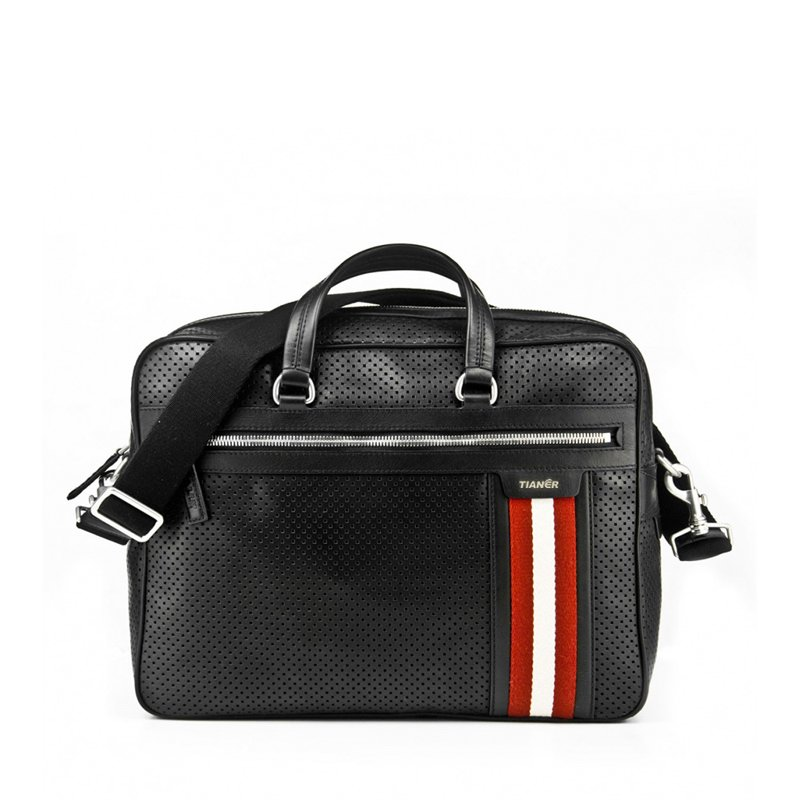

In [11]:
from IPython.display import Image, display_jpeg

display_jpeg(Image("/work/data/hr170102/872822/87282284/00000005.JPG"))

Maybe 00000002.JPG is a trademark image.

In [13]:
for child in root:
    print(child.tag, child.attrib)

trademark-case-files {}
boilerplates {}
filing {}


In [14]:
for child in root[0]:
    print(child.tag, child.attrib)

trademark-case-file {}
signatures {}
fee-types {}
payment {'action-code': 'create', 'version': 'new'}


In [15]:
for child in root[0][0]:
    print(child.tag, child.attrib)

case-file-header {}
base-application-form {}
correspondence-form {}
